Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
pd.options.display.max_columns = None

In [159]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [160]:
categoryvalues = df['category'].value_counts()


#The top 5 categories with more frequency are: Sports & outdoors, Beauty, Handmade clothing, bath & body and birthday gifts.

Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [161]:
top10 = categoryvalues.nlargest(10)



In [162]:
 top10 =pd.DataFrame(top10)

'\nSince there were a lot of categories to use any type of bar/pie plot, we took the 10 categories with the bigger value, and made a \nrepresentation of them. Overall it represents 41% of all the categories\n\nSports & outdoors products are clearly the major category in these catalog\n'

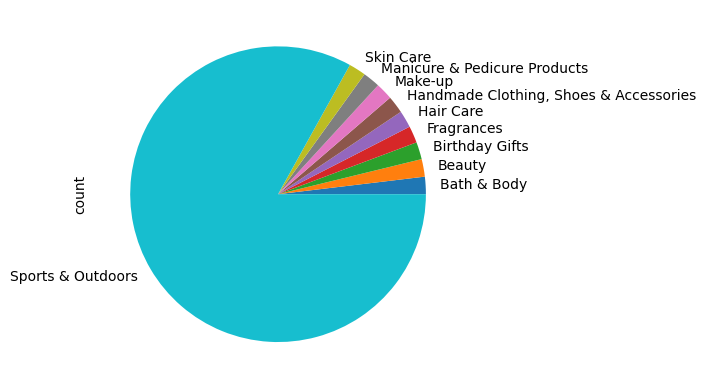

In [163]:
top10.groupby(['category']).sum().plot(kind='pie', y= 'count', legend=False)

'''
Since there were a lot of categories to use any type of bar/pie plot, we took the 10 categories with the bigger value, and made a 
representation of them. Overall it represents 41% of all the categories

Sports & outdoors products are clearly the major category in these catalog
'''

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

 1. Calculate the mean, median, and mode for the price of products.
    What's the average price point of products listed? How does this compare with the most common price point (mode)?
    Measures of Dispersion:

 2. Determine the variance, standard deviation, range, and interquartile range for product price.
    How varied are the product prices? Are there any indicators of a significant spread in prices?
    Visualizations:

 3. Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to   read these diagrams, think why this is, and explain how it could be solved..
    Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [164]:
df = df.drop(df[df['price'] == 0].index)

#We filtered all the rows that had '0' as price, since nothing can cost '0', so we assumed it's not valid input

In [165]:
#1
df['price'].mean()

89.24453985892306

In [166]:
df['price'].median()

19.09

In [167]:
df['price'].mode()

'''
This mode, in relation to the mean, tells us that most prices are really expensive, but the most repeated value appears to be 9.99.
'''

'\nThis mode, in relation to the mean, tells us that most prices are really expensive, but the most repeated value appears to be 9.99.\n'

In [168]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443631e+06,2.443631e+06,2.443631e+06,2.443631e+06,2.443631e+06
mean,1.370547e+06,2.152817e+00,4.805891e+02,8.924454e+01,2.589720e+01
std,8.160583e+05,2.194863e+00,5.944042e+03,3.456102e+02,2.404847e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,6.589205e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349032e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060690e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


AttributeError: Rectangle.set() got an unexpected keyword argument 'kda'

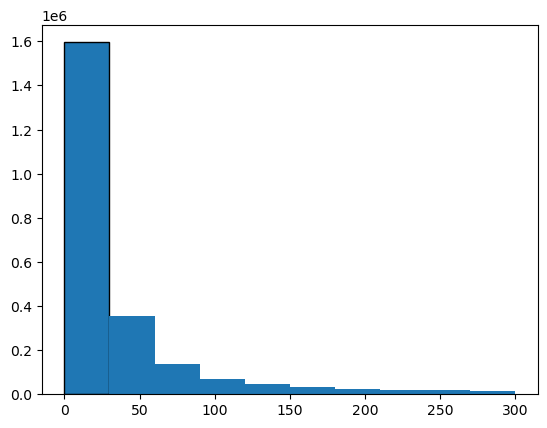

In [194]:
plt.hist(df['price'], range=[0, 300], edgecolor='black')


(array([629219., 650609., 316005., 175041., 105785.,  75559.,  57681.,
         44135.,  33691.,  28652.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

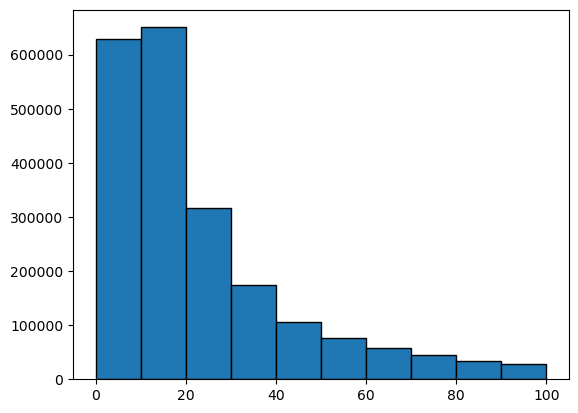

In [197]:
plt.hist(df['price'], range=[0, 100], edgecolor='black')

#We can see that most products fall under the price range of 0 to 20$, the solution to the clarity of the histogram 
# was to make a separate histogram with the range that had most products and initially overwhelmed the histogram

In [171]:
#2
pricedeviation = df['price'].std()
pricevariance = df['price'].var()
pricerange = df['price'].max() - df['price'].min()
print(f'The standard deviation is {pricedeviation}, the variance is {pricevariance}, and the range is {pricerange}')
#The range appears like that since we deleted rows with 'price' = 0

The standard deviation is 345.61018177054603, the variance is 119446.39774346988, and the range is 99999.99


In [172]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
print(f'the first quartile is {q1}, the third one is {q3} and the iqr is {iqr}')

the first quartile is 9.99, the third one is 45.99 and the iqr is 36.0


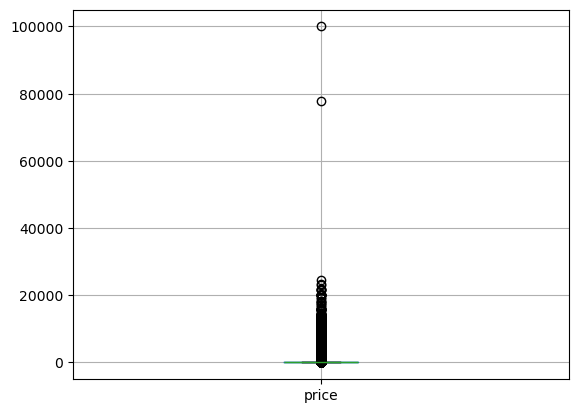

In [199]:
boxplot= df.boxplot(column=['price'])

In [174]:
#The box plot appear to have 2 outliers, that we could get making a loc of the original DF based on prices above certain value, and they 
# appear to be a graphic card and a treadmill

dfexpensive = df.loc[df['price'] > 60000]

dfexpensive.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1987238,2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.0,False,0,Desktop PCs
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.0,False,0,Sports & Outdoors


Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

 - Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

 - Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

 - Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

 - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?-

In [179]:
starsmean= df['stars'].mean().round(3)
starsmode= df['stars'].mode()
starsmedian= df['stars'].median()
print(f'The mean is {starsmean}, the mode is {starsmode}, and the median is {starsmedian}')

The mean is 2.153, the mode is 0    0.0
Name: stars, dtype: float64, and the median is 0.0


In [182]:
starsvariance = df['stars'].var().__round__(3)
starsdeviation = df['stars'].std().__round__(3)
iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f'The standard deviation is {starsdeviation}, the variance is {starsvariance}, and the iqr is {iqr}')

#We can see that there is not a strong consistency, since for a range of (preguntar si la std contiene hacia un lado de la grafica o hacia los dos)

The standard deviation is 2.195, the variance is 4.817, and the iqr is 4.4


In [184]:
priceskew = df['price'].skew().round(3)
pricekurt= df['price'].kurtosis().round()

print(f'The skewness value is {priceskew}, and the kurtosis value is {pricekurt}')


The skewness value is 27.493, and the kurtosis value is 4242.0


(array([1225641.,       0.,    8737.,    1277.,    6837.,   11433.,
          41892.,  116460.,  466801.,  564553.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

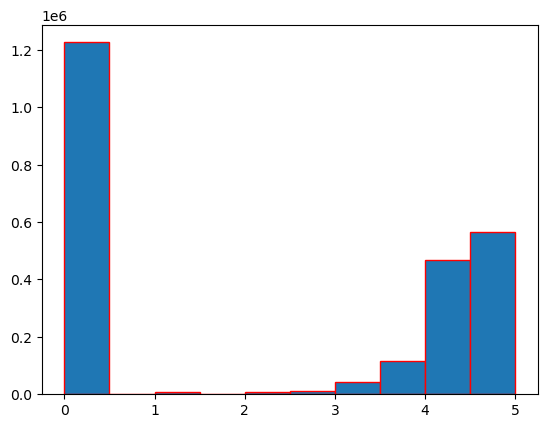

In [193]:
plt.hist(df['stars'], range=(0, 5.0), edgecolor= 'red')

#We can see that there's a lot of inconsistency: The positive ratings increase from 2.5-3 to 5, but there's an overwhelming amount of rating 0,
# which can make the portal unreliable, it being 0 the most common.

In [ ]:
#Yeah, the 0 stars rating is the most common across the wholes histogram, which could tell us one of 2 things, either the page 
# is a scam, the product is geniunely terribleand all the 0 star reviews is a result out of it, or there has been some sort of 
# review bombing to take the product out of the market.